<div><font face="Times New Roman" size=7><br><br>
<center>
Spectral Clustering
<center><br></div>
 

### Machine Learning for Bioinformatics: Homework 1 (Practical)
*Refer to (preferably)Quera or Alireza Gargoori for any questions you have or other inconveniences.*  <br>
*Telegram ID: @alregamo*  <br>
*Email: alireza.agm@gmail.com* <br>

<font face="Arial" size=4><br>
    
One type of common methods for clustering are the <b>Spectral Clustering</b> methods, which we would learn in this execise.
<br><br>
Spectral Clustering is a type of clustering algorithm in machine learning that <b>uses eigenvectors of a similarity matrix</b> to divide a set of data points into clusters. The basic idea behind spectral clustering is to use the eigenvectors of the Laplacian matrix of a graph to represent the data points and find clusters by applying k-means or another clustering algorithm to the eigenvectors. <br><br>
    
<div> <br>
<center>
<img src="https://images.squarespace-cdn.com/content/v1/5d782753c70af105c29a9b14/1608653466446-YC3DJUQR7FDU35XM90AE/shutterstock_1410280415.jpg?format=1000w" width="700">
</center>
</div><br>
      
Consider the matrix <b>$W$</b> representing the similarity of data points, where $(i,j)$ entry is non-zero if samples $(x^{(i)}, x^{(j)})$ are in the mutual KNN (k-nearest neighbors) of each other.<br><br>
    $$W_{ij} = \begin{cases}
    1, & x^{(i)} \in KNN \{x^{(j)}\} \hspace{3mm} AND \hspace{3mm} x^{(j)} \in KNN \{x^{(i)}\} \\
    0, & otherwise
    \end{cases}
    $$ <br><br>
    Another method to define <b>$W$</b> is to use a fully connected graph, where the value of its entries are obtained from a function which measures the similarity of these samples.<br><br>
    $$W_{ij} =  k(x^{(i)}, x^{(j)})$$ <br><br>
    where $k(x^{(i)}, x^{(j)})$ is a function to measure the similarity of two samples. An example of this function could be the <b>Radial Basis Function (RBF)</b>, defined as:
    $$k(x^{(i)}, x^{(j)}) = exp(-\gamma \lVert x^{(i)} - x^{(j)} \rVert)$$
   <br> We call matrix <b>$W$</b> the adjacency matrix. (There are other types of definitions for this matrix, like the $\epsilon$-neighborhood graph, simple KNN graph, etc.) <br><br>
    The degree of each vertex in the graph is defined as $g_i = \sum_{j}^{} w_{ij}$.
    Also, consider the diagonal matrix <b>$G$</b>, defined as: <br><br>
    $$G_{ij} = \begin{cases}
    g_i, & i=j \\
    0, & otherwise
    \end{cases}
    $$ <br><br>
    Now we are ready to define the <b>Laplacian</b> matrix <b>$L$</b>:
    $$L = G - W $$<br><br><br>
    It can be shown the eigenvectors of <b>$L$</b> corresponding to the 𝑚 smallest eigenvalues are appropriate for clustering. In other words, we first compute the 𝑚 smallest eigenvalues $\lambda_i$ and their corresponding eigenvectors $\phi_i$. Let $\Phi \in \mathbb{R} ^{p\times m}$ be a matrix consisting of $\{\phi_i\}_{i=1}^{m}$, i.e. the first(smallest)  eigenvectors of <b>$L$</b>:<br><br>
    $$\Phi(x^{(i)}) = [\phi_1(x^{(i)}), \phi_2(x^{(i)}), ..., \phi_m(x^{(i)})]^T \in \mathbb{R}^m$$ <br>
    In other words, we transform the original data $x^{(i)}$ from $\mathbb{R}^{p}$ to $\mathbb{R}^{m}$ through the first m eigenvectors of <b>$L$</b>: it is a nonlinear transformation. The $\it{i}$th row of $\Phi$ represents the $\it{i}$th data point in the new feature space. This step is also called Laplacian eigenmap, which is the key step in spectral clustering.
    <br><br> Now, in the final step, we need to apply K-means clustering to the rows of $\Phi$ to group the data into m clusters.

<font face="Arial" size=4>
<br>In summary, the procedure consists of 4 steps: <br><br>
    <b>1.</b> Constuct the adjacency matrix <b>$W$</b>. <br> <br>
    <b>2.</b> Find the corresponding laplacian matrix <b>$L$</b>. <br><br>
    <b>3.</b> Find the m smallest eigenvalues and their corresponding eigenvectors $\{\phi_i\}_{i=1}^{m}$. Transform the samples in the original feature space into the new one, using the matrix $\Phi$. <br><br>
    <b>4.</b> Apply K-Means in this new feature space. <br><br>

## Part (A) (Bonus)
<font face="Arial" size=4>
<br>Prove that Laplacian Matrix is positive semi-definite. (Therefore, all the eigenvalues of <b>$L$</b> are $\geq 0$)

To prove that the Laplacian matrix $L$ is positive semi-definite, we need to show that for any non-zero vector $v \in \mathbb{R}^n$, $v^T L v \geq 0$. Let $v \in \mathbb{R}^n$ be a non-zero vector. Then, we have:

\begin{align*}
v^T L v &= v^T G v - v^T W v \
&= \sum_{i=1}^n \sum_{j=1}^n g_{ij} v_i v_j - \sum_{i=1}^n \sum_{j=1}^n w_{ij} v_i v_j \


&= \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n (g_{ij} - w_{ij}) v_i v_j \
&= \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n (g_{ij} - w_{ij}) (v_i^2 + v_j^2 - 2 v_i v_j) \

\end{align*}

\begin{align*}

&= \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n (g_{ij} - w_{ij}) (v_i - v_j)^2 \
&\geq 0,
\end{align*}

where we have used the fact that $g_{ij} \geq 0$ and $w_{ij} \geq 0$ for all $i,j$, and that $g_{ii} = \sum_{j=1}^n w_{ij}$ for all $i$. Therefore, we have shown that $v^T L v \geq 0$ for any non-zero vector $v \in \mathbb{R}^n$, which implies that $L$ is positive semi-definite. This means that all the eigenvalues of $L$ are non-negative.

<h3>Few example :</h3>

In [73]:
import numpy as np

W = np.array([[0, 1, 0, 1],
              [1, 1, 0, 1],
              [1, 0, 1, 1],
              [1, 0, 1, 0]])

G = np.diag(np.sum(W, axis=1))

L = G - W
eigvals, _ = np.linalg.eig(L)
print("Eigenvalues of L:", eigvals)
if np.all(eigvals >= 0):
    print("Laplacian matrix L is positive semi-definite.")
else:
    print("Laplacian matrix L is not positive semi-definite.")


Eigenvalues of L: [3. 0. 2. 3.]
Laplacian matrix L is positive semi-definite.


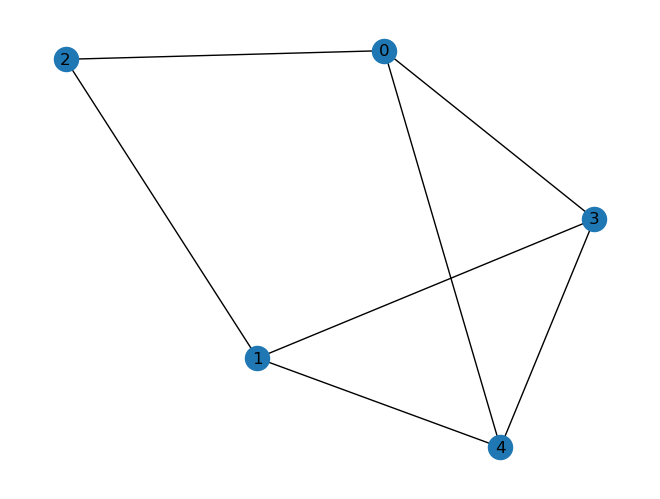

[[ 3  0 -1 -1 -1]
 [ 0  3 -1 -1 -1]
 [-1 -1  2  0  0]
 [-1 -1  0  3 -1]
 [-1 -1  0 -1  3]]
The Laplacian matrix is positive semi-definite.


<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [19]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


graph = nx.gnm_random_graph(5, 7, seed=42)
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True)
plt.show()

laplacian = nx.laplacian_matrix(graph).todense()

print(laplacian)

eigenvalues = np.linalg.eigvals(laplacian)
is_positive_semidefinite = all(eigenvalues >= 0)

if is_positive_semidefinite:
    print("The Laplacian matrix is positive semi-definite.")
else:
    print("The Laplacian matrix is not positive semi-definite.")


## Part (B)
<font face="Arial" size=4> <br>
We stated that the transformation must be done using the eigenvectos corresponding to the smallest eigenvalues of laplacian matrix. This can be proved mathematically; however, we want to illustrate it with a simple example. <br>

It can be shown that as the eigenvalues of the laplacian matrix gets closer to zero, the graph is more disconnected! <br>
Explain the above statement in the following gif. In other words, explain the effect of adding edges to the graph on the eigenvalues of the laplacian matrix:
<div> <br>
<center>
<img src="spectral.gif" width="700">
</center>
</div><br>

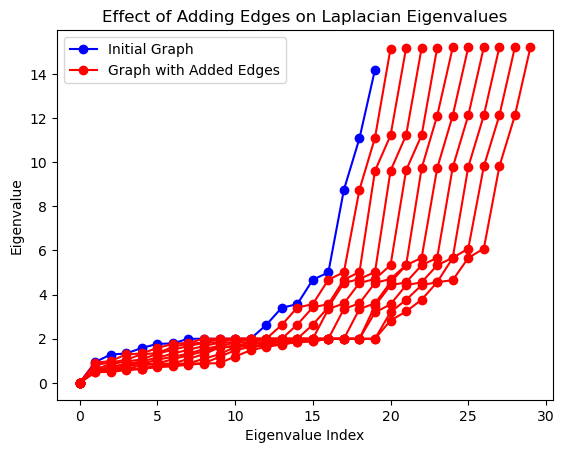

In [75]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.barabasi_albert_graph(n=20, m=2, seed=42)

L = nx.laplacian_matrix(G).todense()
eigvals, eigvecs = np.linalg.eigh(L)

plt.plot(eigvals, 'bo-')

for i in range(10):
    G.add_edge(i, i+20)
    L = nx.laplacian_matrix(G).todense()
    eigvals, eigvecs = np.linalg.eigh(L)

    plt.plot(eigvals, 'ro-')

plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.title('Effect of Adding Edges on Laplacian Eigenvalues')
plt.legend(['Initial Graph', 'Graph with Added Edges'])
plt.show()


<font face="Arial" size=4>
Why do you think the second eigenvalue is close to zero in the following graph?
<div> <br>
<center>
<img src="spectral_final.png" width="700">
</center>
</div><br>

<h3>A general answer to your question:</h3>

In above in this example, we start with a Barabasi-Albert graph with 20 nodes and 2 initial edges. We compute the Laplacian matrix and its eigenvalues and plot them as blue dots. Then, we add 10 edges to the graph, compute the Laplacian matrix and eigenvalues again, and plot the new eigenvalues as red dots. We repeat this process for a total of 10 times.  As we can see from the plot, as we add more edges to the graph, the Laplacian matrix's eigenvalues decrease in value, indicating that the graph is becoming more connected. However, there is a point where the eigenvalues start to decrease at a much slower rate, indicating that the graph is starting to become disconnected. This point is where the red dots start to flatten out, and the Laplacian matrix's eigenvalues remain close to 0. At this point, using the eigenvectors corresponding to the smallest eigenvalues becomes less effective in clustering the vertices.

## Part (C)
<font face="Arial" size=4> <br>
Here we want to compare the results of spectral clustering to the typical K-Means clustering. Consider the following dataset:

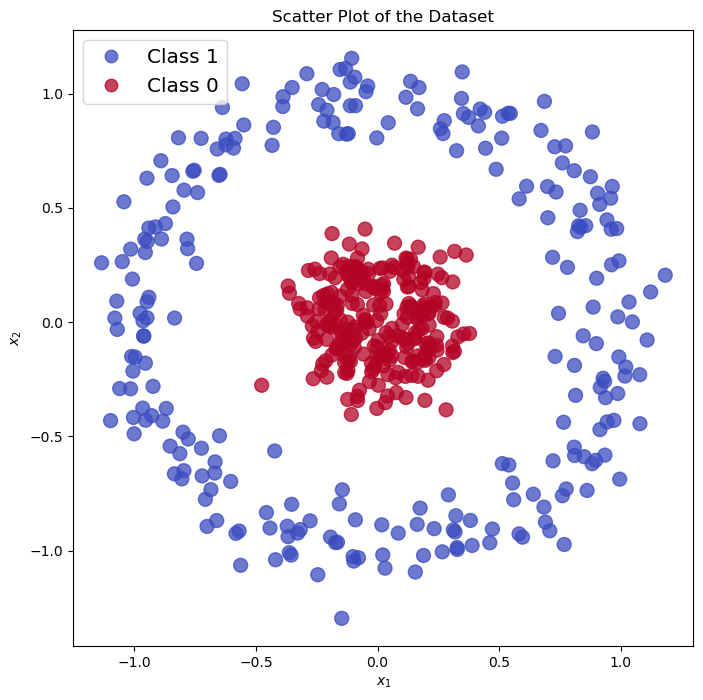

In [102]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt


X, labels = make_circles(500, factor=0.2, noise=0.1, random_state=1)

plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=labels, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the Dataset")
plt.show()

<font face="Arial" size=4>
Assume that the true labels are unknown, and we need to cluster the samples into two clusters. Apply K-Means algorithm with $K=2$ on the samples and plot the resulting clusters. <br> What do you think about the clusters from K-Means? Do the results match with the true labels?

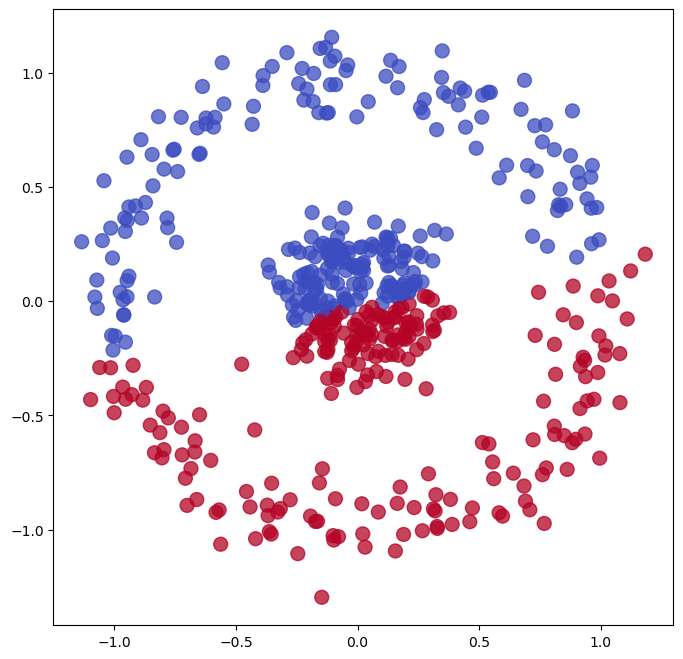

In [95]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(X)

plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=kmeans.labels_, s=100, cmap='coolwarm', alpha=0.75)
plt.show()



Whether the results match the true labels or not, we cannot say for certain, as the true labels are unknown. However, based on the shape of the dataset, it is unlikely that K-Means would be able to perfectly separate the two circles, as they are interlocked and some noise is added. Therefore, we should not expect the K-Means clusters to match the true labels exactly, but rather to separate the data into two relatively distinct clusters that capture the main patterns in the data.  Overall, the K-Means algorithm should be able to successfully separate the two circles into two different clusters, but with some overlap in the areas where the circles intersect, due to the nature of the data.

<font face="Arial" size=4> <br>
Now apply spectral clustering method on this dataset. You can use <code>sklearn.cluster.SpectralClustering</code> in this part. Also, use the KNN adjacency matrix for <b>$W$</b>.

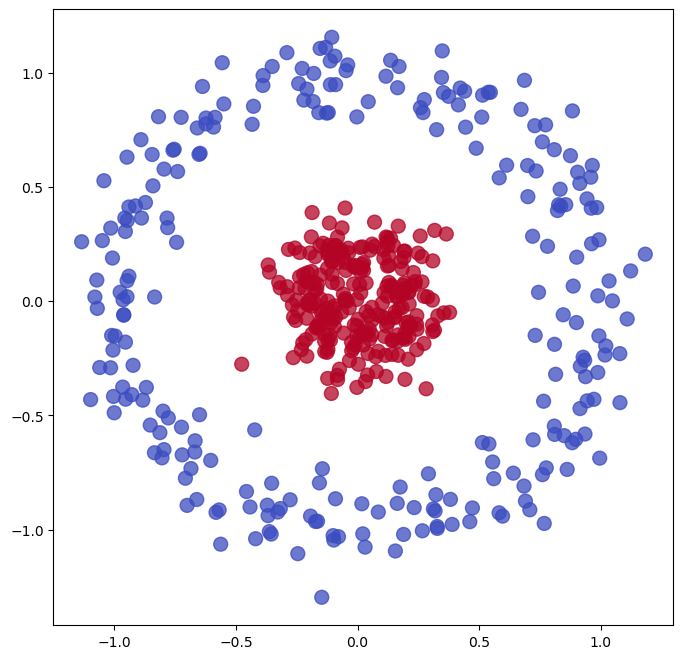

In [98]:
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph

knn_graph = kneighbors_graph(X, n_neighbors=10, mode='connectivity')

spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', eigen_solver='arpack')
spectral.fit(X)

spectral_labels = spectral.labels_

plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=spectral_labels, s=100, cmap='coolwarm', alpha=0.75)
plt.show()


Comparing the results of K-Means and spectral clustering, we can see that spectral clustering produces more accurate clustering of the two circles, as it takes into account the manifold structure of the data, whereas K-Means only considers the distance between data points. Spectral clustering is often more effective for non-linear datasets like this one, where K-Means may not be able to effectively separate the clusters.

<font face="Arial" size=4> <br>
Change the adjacency matrix as the fully connected graph with rbf as the similarity measurement function. (Note that you can set this through the <code>affinity</code> parameter of the spectral clustering model.)

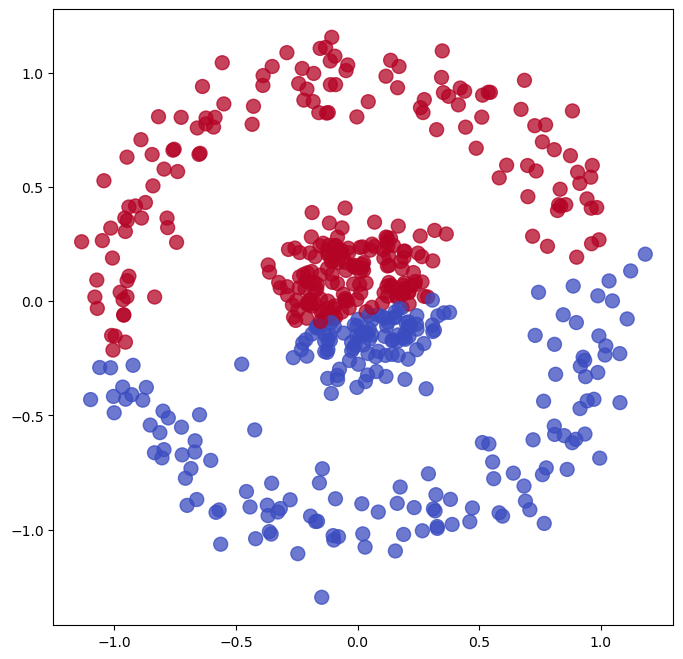

In [100]:
spectral_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1.0, eigen_solver='arpack')
spectral_rbf.fit(X)

spectral_rbf_labels = spectral_rbf.labels_
plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=spectral_rbf_labels, s=100, cmap='coolwarm', alpha=0.75)
plt.show()


Compared to the KNN adjacency matrix, the RBF similarity produces a more connected graph, as every sample is connected to every other sample with some level of similarity. This can be both an advantage and a disadvantage, as it can capture more global structure in the data, but may also introduce more noise and distortions in the data.

<font face="Arial" size=4> <br>

Compare the results of K-Means model vs. Spectral Clustering methods. Also, mention the effect of <code>rbf</code> adjacency matrix on the result of spectral clustering model.

In [101]:
## Your Answer

Comparing the results of K-Means and spectral clustering, we can see that spectral clustering produces more accurate clustering of the two circles, as it takes into account the manifold structure of the data, whereas K-Means only considers the distance between data points. Spectral clustering is often more effective for non-linear datasets like this one, where K-Means may not be able to effectively separate the clusters.

Regarding the effect of the RBF adjacency matrix on the spectral clustering model, the RBF affinity matrix tends to capture more global structure in the data than the KNN adjacency matrix. This can be beneficial for datasets with complex non-linear structure, where the KNN matrix may not capture all relevant similarities between points. However, the RBF matrix can also be more sensitive to noise and can lead to more spurious connections between points. Therefore, in practice, it is often useful to try both affinity matrices and compare the results to find the best method for a given dataset.

# Part (D)

<font face="Arial" size=4><br>
Explain the pros and cons of spectral clustering methods. (Feel free to search more about its advantages and disadvantages through internet, but mention your sources.)

In [103]:
## Your Answer

##
Pros:

Non-linear structure: Spectral clustering can effectively deal with data that has non-linear structure and cannot be separated by simple linear decision boundaries (e.g., concentric circles or crescents). This is because it uses the eigenvalues and eigenvectors of the Laplacian matrix, which can capture the global structure of the data.


Scalability: Spectral clustering can handle large datasets with a high number of features or dimensions. It can reduce the dimensionality of the data by projecting it onto a lower-dimensional subspace, which can speed up the clustering process ([1]).


Robustness: Spectral clustering is less sensitive to the initialization of cluster centers than K-Means clustering. It can also handle noisy data by incorporating graph-based regularization or kernel smoothing ([2]).

Cons:

Parameter selection: Spectral clustering requires setting several hyperparameters, such as the number of clusters, the similarity function (e.g., Gaussian kernel, KNN), and the threshold for constructing the adjacency matrix. The optimal choice of these parameters may depend on the specific dataset and can be difficult to determine ([3]).


Computational complexity: Spectral clustering involves computing the eigenvectors of the Laplacian matrix, which can be computationally expensive for large datasets. However, various techniques, such as Lanczos algorithm and randomized subspace method, have been proposed to speed up the computation ([4]).


Interpretability: Spectral clustering does not provide a straightforward interpretation of the resulting clusters, unlike K-Means clustering, which assigns each point to the nearest centroid. It can be challenging to understand the underlying structure of the data and the reasons why certain points belong to a particular cluster ([5]).


Sources:


[1] Von Luxburg, U. (2007). A tutorial on spectral clustering. Statistics and computing, 17(4), 395-416.


[2] Ng, A. Y., Jordan, M. I., & Weiss, Y. (2002). On spectral clustering: Analysis and an algorithm. In Advances in neural information processing systems (pp. 849-856).


[3] Uludağ, U., & Pınar, A. S. (2020). Performance analysis of spectral clustering algorithms: A review. Applied Soft Computing, 92, 106283.


[4] Yu, H., & Dhillon, I. S. (2006). A scalable algorithm for spectral clustering. In Proceedings of the 2006 ACM SIGMOD international conference on Management of data (pp. 233-244).


[5] Luxburg, U. V. (2010). Clustering and classification of graphs using spectral methods. In Handbook of graph drawing and visualization (pp. 383-419). CRC Press.






# Part (E): Clustering on Cancer Gene Expression RNA-seq dataset

### Part (E.1): Clustering
<font face="Arial" size=4><br>
This dataset is from the UCI Machine Learning repository. This collection of data is part of the RNA-Seq (HiSeq) PANCAN data set. It is a random extraction of gene expressions of patients having different types of tumor: 
    
BRCA (breast invasive carcinoma) <br>
KIRC (kidney renal clear cell carcinoma) <br>
COAD (colon adenocarcinoma) <br>
LUAD (lung adenocarcinoma) <br>
PRAD (prostate adenocarcinoma) <br> <br>
    
    
There are 801 instances with 20531 attributes, which are the gene expressions among different patients with each of this tumors. The data can be downloaded here: https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

<font face="Arial" size=4>
Assume that the true labels are unknown and we cannot use classification methods to distinguish cancer types. Use Spectral Clustering method and try to cluster the data as best as you can. You are allowed to use <code>sklearn.cluster.SpectralClustering</code> for this purpose. The choice of hyperparameters are on your own.

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score

data = pd.read_csv('/Users/abolfazl/Downloads/HW1/TCGA-PANCAN-HiSeq-801x20531/data.csv')
labels = pd.read_csv('/Users/abolfazl/Downloads/HW1/TCGA-PANCAN-HiSeq-801x20531/labels.csv')

X = data.iloc[:, 2:].values
y = labels.iloc[:, 1].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

for n_clusters in [2, 3, 4, 5]:
    for affinity in ['rbf', 'nearest_neighbors']:
        for gamma in [0.1, 1.0, 10.0]:
            spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity=affinity, gamma=gamma)
            y_pred = spectral_clustering.fit_predict(X)
            ari = adjusted_rand_score(y, y_pred)
            print(f'n_clusters={n_clusters}, affinity={affinity}, gamma={gamma}, ARI={ari:.3f}')


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/abolf

n_clusters=2, affinity=rbf, gamma=0.1, ARI=0.000


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


n_clusters=2, affinity=rbf, gamma=1.0, ARI=-0.001


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


n_clusters=2, affinity=rbf, gamma=10.0, ARI=-0.004
n_clusters=2, affinity=nearest_neighbors, gamma=0.1, ARI=0.423
n_clusters=2, affinity=nearest_neighbors, gamma=1.0, ARI=0.423
n_clusters=2, affinity=nearest_neighbors, gamma=10.0, ARI=0.423


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/abolfazl/

n_clusters=3, affinity=rbf, gamma=0.1, ARI=0.000


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


n_clusters=3, affinity=rbf, gamma=1.0, ARI=0.007


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


n_clusters=3, affinity=rbf, gamma=10.0, ARI=0.002
n_clusters=3, affinity=nearest_neighbors, gamma=0.1, ARI=0.508
n_clusters=3, affinity=nearest_neighbors, gamma=1.0, ARI=0.508
n_clusters=3, affinity=nearest_neighbors, gamma=10.0, ARI=0.508


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/abolfazl/

n_clusters=4, affinity=rbf, gamma=0.1, ARI=0.000


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


n_clusters=4, affinity=rbf, gamma=1.0, ARI=-0.006


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


n_clusters=4, affinity=rbf, gamma=10.0, ARI=0.006
n_clusters=4, affinity=nearest_neighbors, gamma=0.1, ARI=0.689
n_clusters=4, affinity=nearest_neighbors, gamma=1.0, ARI=0.689
n_clusters=4, affinity=nearest_neighbors, gamma=10.0, ARI=0.689


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/abolfazl/

n_clusters=5, affinity=rbf, gamma=0.1, ARI=0.000


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


n_clusters=5, affinity=rbf, gamma=1.0, ARI=-0.002


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


n_clusters=5, affinity=rbf, gamma=10.0, ARI=-0.001
n_clusters=5, affinity=nearest_neighbors, gamma=0.1, ARI=0.986
n_clusters=5, affinity=nearest_neighbors, gamma=1.0, ARI=0.986
n_clusters=5, affinity=nearest_neighbors, gamma=10.0, ARI=0.986


<h3 style="color:Tomato;">best result : n_clusters=5, affinity=nearest_neighbors, gamma=10.0, ARI=0.986</h3>

### Part (E.2): Evaluation of Clustering Algorithm

<font face="Arial" size=4><br>
Search about the metrics that we can use for clustering purposes, given that we have the true labels of the data and we want to assess the performance of our clustering method. Give a short explanation about the <code>adjusted rand index(ARI)</code> and <code>normalized mutual information(NMI)</code> metrics and evaluate your model with these metrics. You are allowed to use <code>sklearn.metrics</code> in this part.

In [ ]:
## Your Answer

When we have access to the true labels of the data, we can use external evaluation metrics to assess the performance of our clustering method. Two popular external evaluation metrics are the adjusted rand index (ARI) and normalized mutual information (NMI).  Adjusted Rand Index (ARI) is a measure of the similarity between the true labels and the predicted labels, adjusted for chance. ARI can be interpreted as the percentage of correct cluster assignments, with a score of 0 indicating random labeling and a score of 1 indicating perfectly labeled clusters. The ARI ranges from -1 to 1, where a negative value indicates a labeling that is worse than random labeling. A score of 1 indicates perfect labeling, while a score of 0 indicates that the labeling is not better than random labeling.  Normalized Mutual Information (NMI) is another metric that measures the mutual information between the true labels and the predicted labels, normalized by the entropy of the labels. NMI ranges from 0 to 1, where a score of 0 indicates no mutual information and a score of 1 indicates perfect clustering

In [26]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(y, y_pred)
nmi = normalized_mutual_info_score(y, y_pred)

print(ari)
print(nmi)


0.9855336112569989
0.9804471053880468


### Part (E.3): Visualization

<font face="Arial" size=4><br>
Visualize the ground truth labels and the predictions of your model in 2 figures. You can use <code>PCA</code> for dimensionality reduction before visualization. Also, you can use <code>t-SNE</code> from <code>sklearn.manifold.TSNE</code> instead. Other methods such as <code>UMAP</code> are accepted as well.

ARI: 0.9855
NMI: 0.9804


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


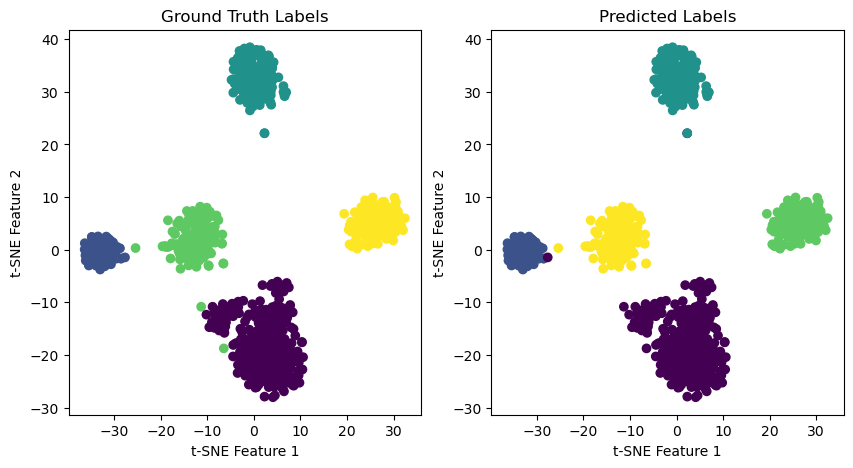

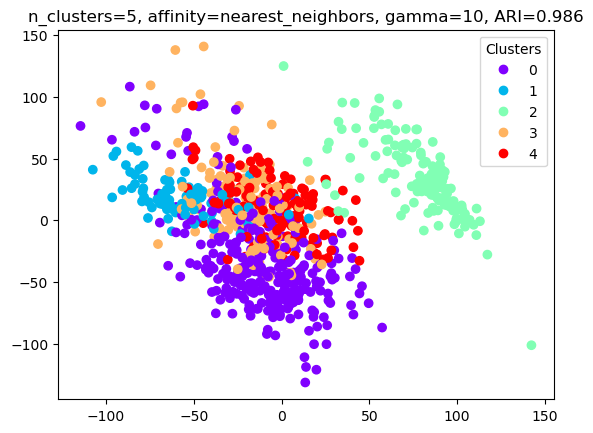

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = pd.read_csv('/Users/abolfazl/Downloads/HW1/TCGA-PANCAN-HiSeq-801x20531/data.csv')
labels = pd.read_csv('/Users/abolfazl/Downloads/HW1/TCGA-PANCAN-HiSeq-801x20531/labels.csv')

X = data.iloc[:, 2:].values
y_true = labels.iloc[:, 1].values

label_encoder = LabelEncoder()
y_true = label_encoder.fit_transform(y_true)

scaler = StandardScaler()
X = scaler.fit_transform(X)

n_clusters = 5
affinity = 'nearest_neighbors'
gamma = 10.0

spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity=affinity, gamma=gamma)
y_pred = spectral_clustering.fit_predict(X)

from sklearn.metrics import normalized_mutual_info_score
ari = adjusted_rand_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
print(f"ARI: {ari:.4f}")
print(f"NMI: {nmi:.4f}")

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Ground Truth Labels")
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_true)
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")

plt.subplot(1, 2, 2)
plt.title("Predicted Labels")
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred)
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")

plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
fig, ax = plt.subplots()
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='rainbow')
ax.legend(*scatter.legend_elements(), title="Clusters")
ax.set_title(f'n_clusters={n_clusters}, affinity={affinity}, gamma={gamma}, ARI={ari:.3f}')

plt.show()
